In [2]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# To Scale our data
from sklearn.preprocessing import scale

# To perform KMeans clustering 
from sklearn.cluster import KMeans

# To perform Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [4]:
Base_polpop_iell_csrf=pd.read_csv('C:\MS\EDA\Base_polpop_iell_csrf_17oct.csv')

In [5]:
Base_polpop_iell_csrf.isnull().sum()

Unnamed: 0                           0
City_poll                            0
Type_of_Location                     0
year_number                          0
month_number                         0
NO2_Median                          38
RSPM_PM10_Median                  1738
SO2_Median                          38
SPM_Median                        2725
Median_SO2_MOM_diff                211
Median_NO2_MOM_diff                212
Median_RSPM_PM10_MOM_diff         1821
Median_SPM_MOM_diff               2853
NO2_P10                             38
RSPM_PM10_P10                     1738
SO2_P10                             38
SPM_P10                           2725
P10_NO2_MOM_diff                   212
P10_SO2_MOM_diff                   211
P10_RSPM_PM10_MOM_diff            1821
P10_SPM_MOM_diff                  2853
NO2_P90                             38
RSPM_PM10_P90                     1738
SO2_P90                             38
SPM_P90                           2725
month_number_diff        

In [12]:
YearClusterDataNSo2=Base_polpop_iell_csrf[['rec_id','NO2_Median','NO2_P10','NO2_P90','SO2_Median','SO2_P10','SO2_P90']]

In [14]:
YearClusterDataNSo2.isnull().any(axis=0) 

rec_id        False
NO2_Median     True
NO2_P10        True
NO2_P90        True
SO2_Median     True
SO2_P10        True
SO2_P90        True
dtype: bool

In [15]:
YearClusterDataNSo2.isnull().sum()

rec_id         0
NO2_Median    38
NO2_P10       38
NO2_P90       38
SO2_Median    38
SO2_P10       38
SO2_P90       38
dtype: int64

In [16]:
YearClusterDataNSo2.dropna(inplace=True)

In [17]:
YearClusterDataNSo2_ori=YearClusterDataNSo2

In [18]:
YearClusterDataNSo2=YearClusterDataNSo2[['NO2_Median','NO2_P10','NO2_P90','SO2_Median','SO2_P10','SO2_P90']]

In [19]:
YearClusterDataNSo2.isnull().sum()

NO2_Median    0
NO2_P10       0
NO2_P90       0
SO2_Median    0
SO2_P10       0
SO2_P90       0
dtype: int64

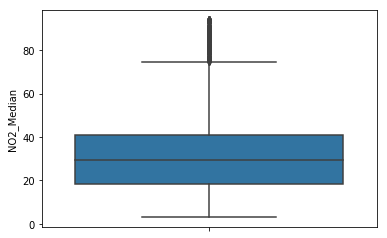

In [22]:
sns.boxplot(y="NO2_Median", data=YearClusterDataNSo2)

In [23]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
YearClusterDataNSo2_norm = standard_scaler.fit_transform(YearClusterDataNSo2)

In [24]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [25]:
hopkins(YearClusterDataNSo2_norm)

AttributeError: 'numpy.ndarray' object has no attribute 'values'

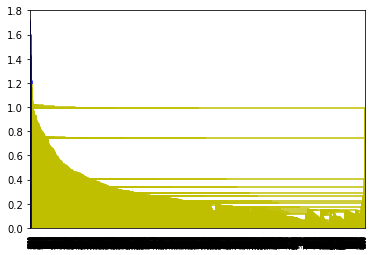

In [26]:
# heirarchical clustering
mergings = linkage(YearClusterDataNSo2_norm, method = "single", metric='euclidean')
dendrogram(mergings)
plt.show()

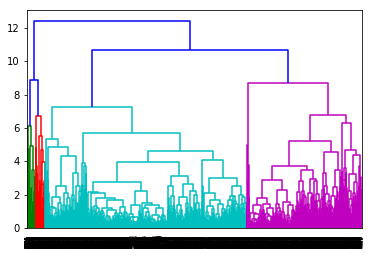

In [27]:
# heirarchical clustering
mergings = linkage(YearClusterDataNSo2_norm, method = "complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [29]:
YearClusterDataNSo2_ori.head()

,rec_id,NO2_Median,NO2_P10,NO2_P90,SO2_Median,SO2_P10,SO2_P90
0,0,12.0,10.4,14.4,11.0,7.8,12.6
1,1,11.0,10.2,11.8,9.0,8.2,9.8
2,2,10.0,10.0,10.0,9.0,9.0,9.0
3,3,14.0,12.6,15.0,12.0,11.6,13.0
4,4,14.0,11.0,14.6,12.0,9.6,13.0


In [65]:
clusterCut = pd.Series(cut_tree(mergings, n_clusters = 4).reshape(-1,))
YearClusterDataNSo2_OriClus = pd.concat([YearClusterDataNSo2_ori, clusterCut], axis=1)

In [66]:
YearClusterDataNSo2_OriClus.columns

Index([    'rec_id', 'NO2_Median',    'NO2_P10',    'NO2_P90', 'SO2_Median',
          'SO2_P10',    'SO2_P90',            0],
      dtype='object')

In [67]:
YearClusterDataNSo2_OriClus.columns=[ 'rec_id',  'NO2_Median',     'NO2_P10',
           'NO2_P90',  'SO2_Median',     'SO2_P10',     'SO2_P90',    'ClusterId']

In [68]:
YearClusterDataNSo2_OriClus.head()

,rec_id,NO2_Median,NO2_P10,NO2_P90,SO2_Median,SO2_P10,SO2_P90,ClusterId
0,0.0,12.0,10.4,14.4,11.0,7.8,12.6,0.0
1,1.0,11.0,10.2,11.8,9.0,8.2,9.8,0.0
2,2.0,10.0,10.0,10.0,9.0,9.0,9.0,0.0
3,3.0,14.0,12.6,15.0,12.0,11.6,13.0,0.0
4,4.0,14.0,11.0,14.6,12.0,9.6,13.0,0.0


In [69]:
clusters_NO2_Median = 	pd.DataFrame(YearClusterDataNSo2_OriClus.groupby(["ClusterId"]).NO2_Median.mean())
clusters_NO2_P10 = 	pd.DataFrame(YearClusterDataNSo2_OriClus.groupby(["ClusterId"]).NO2_P10.mean())
clusters_NO2_P90 = 	pd.DataFrame(YearClusterDataNSo2_OriClus.groupby(["ClusterId"]).NO2_P90.mean())
clusters_SO2_Median = 	pd.DataFrame(YearClusterDataNSo2_OriClus.groupby(["ClusterId"]).SO2_Median.mean())
clusters_SO2_P10 = 	pd.DataFrame(YearClusterDataNSo2_OriClus.groupby(["ClusterId"]).SO2_P10.mean())
clusters_SO2_P90 = 	pd.DataFrame(YearClusterDataNSo2_OriClus.groupby(["ClusterId"]).SO2_P90.mean())

In [71]:
df = pd.concat([pd.Series([0,1,2,3]), clusters_NO2_Median, clusters_NO2_P10, clusters_NO2_P90,clusters_SO2_Median,clusters_SO2_P10,clusters_SO2_P90], axis=1)
df.columns = ["ClusterID", "clusters_NO2_Median", "clusters_NO2_P10", "clusters_NO2_P90","clusters_SO2_Median","clusters_SO2_P10","clusters_SO2_P90"]
df.head()

,ClusterID,clusters_NO2_Median,clusters_NO2_P10,clusters_NO2_P90,clusters_SO2_Median,clusters_SO2_P10,clusters_SO2_P90
0,0,24.690627,19.555168,31.540514,15.616845,13.003909,19.124973
1,1,41.021001,34.144723,49.281153,20.909361,17.028311,26.265031
2,2,45.506325,38.311446,52.263373,31.684639,27.167229,36.303614
3,3,40.017708,36.870694,43.911528,31.336111,29.127222,33.980347


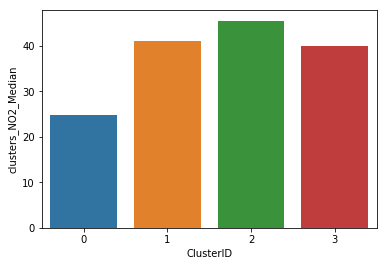

In [72]:
#plotting barplot
sns.barplot(x=df.ClusterID, y=df.clusters_NO2_Median)

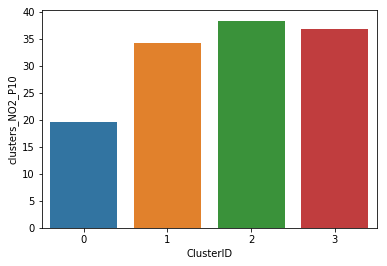

In [73]:
#plotting barplot
sns.barplot(x=df.ClusterID, y=df.clusters_NO2_P10)

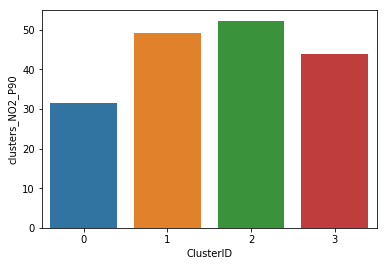

In [74]:
#plotting barplot
sns.barplot(x=df.ClusterID, y=df.clusters_NO2_P90)

In [75]:
df.columns

Index(['ClusterID', 'clusters_NO2_Median', 'clusters_NO2_P10',
       'clusters_NO2_P90', 'clusters_SO2_Median', 'clusters_SO2_P10',
       'clusters_SO2_P90'],
      dtype='object')

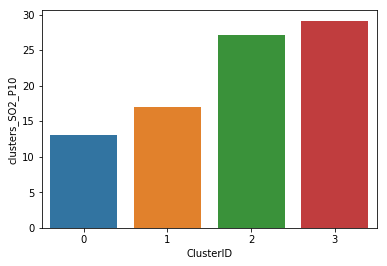

In [77]:
#plotting barplot
sns.barplot(x=df.ClusterID, y=df.clusters_SO2_P10)

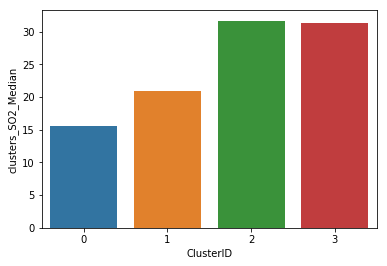

In [78]:
#plotting barplot
sns.barplot(x=df.ClusterID, y=df.clusters_SO2_Median)

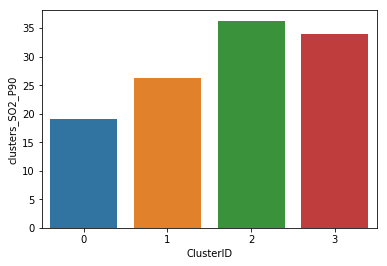

In [79]:
#plotting barplot
sns.barplot(x=df.ClusterID, y=df.clusters_SO2_P90)

In [80]:
df[df.ClusterID==0]

,ClusterID,clusters_NO2_Median,clusters_NO2_P10,clusters_NO2_P90,clusters_SO2_Median,clusters_SO2_P10,clusters_SO2_P90
0,0,24.690627,19.555168,31.540514,15.616845,13.003909,19.124973


             variables     values
0            ClusterID   0.000000
1  clusters_NO2_Median  24.690627
2     clusters_NO2_P10  19.555168
3     clusters_NO2_P90  31.540514
4  clusters_SO2_Median  15.616845
5     clusters_SO2_P10  13.003909
6     clusters_SO2_P90  19.124973
             variables     values
0            ClusterID   1.000000
1  clusters_NO2_Median  41.021001
2     clusters_NO2_P10  34.144723
3     clusters_NO2_P90  49.281153
4  clusters_SO2_Median  20.909361
5     clusters_SO2_P10  17.028311
6     clusters_SO2_P90  26.265031
             variables     values
0            ClusterID   2.000000
1  clusters_NO2_Median  45.506325
2     clusters_NO2_P10  38.311446
3     clusters_NO2_P90  52.263373
4  clusters_SO2_Median  31.684639
5     clusters_SO2_P10  27.167229
6     clusters_SO2_P90  36.303614
             variables     values
0            ClusterID   3.000000
1  clusters_NO2_Median  40.017708
2     clusters_NO2_P10  36.870694
3     clusters_NO2_P90  43.911528
4  clusters_SO

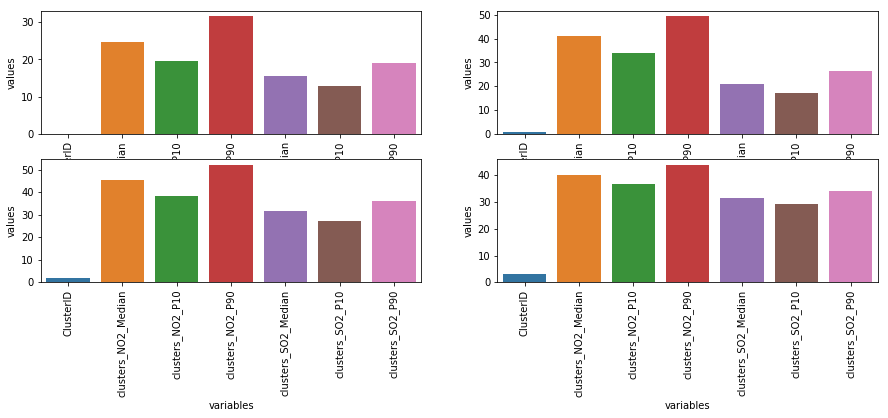

In [100]:
plt.figure(figsize = (15,5))
for i in range(0, 4):    
    ClusterOne=np.transpose(df[df.ClusterID==i])
    ClusterOne.reset_index(inplace=True)
    ClusterOne.columns=['variables', 'values']
    ClusterOne['values']=ClusterOne['values'].map(float)
    print(ClusterOne)
    plt.subplot(2, 2, i+1)
    t=sns.barplot(x='variables',y='values',data=ClusterOne)
    t.set_xticklabels(labels=ClusterOne.variables,rotation=90)

In [83]:
YearClusterDataNSo2_OriClus.columns

Index(['rec_id', 'NO2_Median', 'NO2_P10', 'NO2_P90', 'SO2_Median', 'SO2_P10',
       'SO2_P90', 'ClusterId'],
      dtype='object')

In [84]:
woyCluster=YearClusterDataNSo2_OriClus[['rec_id','ClusterId']]

In [85]:
Base_polpop_iell_csrf_ClusWoYear=Base_polpop_iell_csrf.merge(woyCluster,how='left', suffixes=('_data', '_cluster'),left_on=['rec_id'], right_on=['rec_id'])

In [86]:
Base_polpop_iell_csrf_ClusWoYear.columns

Index(['Unnamed: 0', 'City_poll', 'Type_of_Location', 'year_number',
       'month_number', 'NO2_Median', 'RSPM_PM10_Median', 'SO2_Median',
       'SPM_Median', 'Median_SO2_MOM_diff',
       ...
       'Main_District_Highway_per', 'Other_district_Rural_Roads_per',
       'indus_by_overall', 'indus_by_forest', 'indus_by_nonforest', 'rec_id',
       'RainPerArea', 'CarSalesPerArea', 'RainPerCarSales', 'ClusterId'],
      dtype='object', length=107)

In [94]:
Base_ClusWoYear=Base_polpop_iell_csrf_ClusWoYear[['City_poll','Type_of_Location', 'ClusterId','year_number','month_number']]

In [95]:
Base_ClusWoYear.head()

,City_poll,Type_of_Location,ClusterId,year_number,month_number
0,AKOLA,Industrial,0.0,2011,1.0
1,AKOLA,Industrial,0.0,2011,2.0
2,AKOLA,Industrial,0.0,2011,3.0
3,AKOLA,Industrial,0.0,2011,4.0
4,AKOLA,Industrial,0.0,2011,5.0


In [96]:
Base_ClusWoYear=Base_ClusWoYear.sort_values(by=['City_poll', 'year_number','month_number'])

In [97]:
Base_ClusWoYear.shape

(5715, 5)

In [98]:
Base_ClusWoYear.head()

,City_poll,Type_of_Location,ClusterId,year_number,month_number
0,AKOLA,Industrial,0.0,2011,1.0
12,AKOLA,Residential,0.0,2011,1.0
1,AKOLA,Industrial,0.0,2011,2.0
13,AKOLA,Residential,0.0,2011,2.0
2,AKOLA,Industrial,0.0,2011,3.0


In [99]:
Base_ClusWoYear.to_csv(path_or_buf ='C:\MS\EDA\Base_ClusWoYear_19oct.csv')

---- kmeans

In [59]:
# Kmeans with K=5
model_clus5 = KMeans(n_clusters = 7, max_iter=50)
model_clus5.fit(YearClusterDataNSo2_norm)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=7, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

## Silhouette Analysis

$$\text{silhouette score}=\frac{p-q}{max(p,q)}$$

$p$ is the mean distance to the points in the nearest cluster that the data point is not a part of

$q$ is the mean intra-cluster distance to all the points in its own cluster.

* The value of the silhouette score range lies between -1 to 1. 

* A score closer to 1 indicates that the data point is very similar to other data points in the cluster, 

* A score closer to -1 indicates that the data point is not similar to the data points in its cluster.m

In [61]:
from sklearn.metrics import silhouette_score
sse_ = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k).fit(YearClusterDataNSo2_norm)
    sse_.append([k, silhouette_score(YearClusterDataNSo2_norm, kmeans.labels_)])

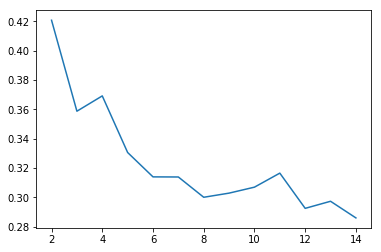

In [62]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);

### 4 seems to get a spike

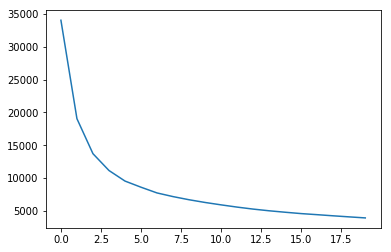

In [63]:
# sum of squared distances
ssd = []
for num_clusters in list(range(1,21)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(YearClusterDataNSo2_norm)
    ssd.append(model_clus.inertia_)

plt.plot(ssd)

#### 5 is at a lower end may be four truely is better